### 특징 벡터의 파라미터로 들어갈 features (단일값 산출이 가능한 것 위주로 선정)
- **MFCC**
- **tempo**(global tempo)
- **spectral centroid**
- **spectral roll-off**
- spectral valley => zero-crossing rate로 대체
- spectral spread (분산 범위)(구하는 법 아직 못찾음)
- spectral flux (구하는 법 아직 못찾음)

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

# 1. 벡터 차원 축소
## 1) Feature Selection

In [4]:
df = pd.read_csv("music_experiment.csv")#; df.index.name = 'record' 뭔지몰겠음
cols = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mel1','mel2','mel3','mel4','mel5','mel6','mel7','mel8','mel9','mel10','cent1','cent2','cent3','cent4','cent5','cent6','cent7','cent8','cent9','cent10','cont1','cont2','cont3','cont4','cont5','cont6','cont7','tempo1','tempo2','tempo3','tempo4','tempo5','tempo6','tempo7','tempo8','tempo9','tempo10']

x = df[cols]
y = df['category']

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x,y)

print(cols)
print(rfe.ranking_)

['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mel1', 'mel2', 'mel3', 'mel4', 'mel5', 'mel6', 'mel7', 'mel8', 'mel9', 'mel10', 'cent1', 'cent2', 'cent3', 'cent4', 'cent5', 'cent6', 'cent7', 'cent8', 'cent9', 'cent10', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']
[ 6  4  3  2  1 16 12 15 21 19 22 27 13  9 23 29 24 14  8 10 41 35 34 40
 33 31 37 42 43 39 17 28  7 25 18 30  1  5 11 20 36 26 32 38 45 46 44]


## 2) PCA

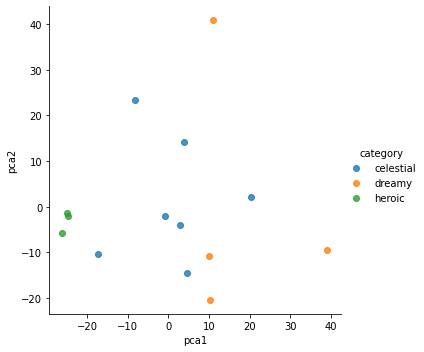

In [32]:
pca1 = PCA(n_components=2)
# Fit the model with X and apply the dimensionality reduction on X.
out_pca1 = pca1.fit_transform(df[['mfcc2','mel4',]])
df_pca1 = pd.DataFrame(data = out_pca1, columns=['pca1','pca2'])
new_df_pca1 = pd.concat([df_pca1, df[['category']]], axis=1)
sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca1, fit_reg=False)

In [6]:
print(pca1.explained_variance_ratio_)

[0.7107808 0.2892192]


In [7]:
pca2 = PCA(n_components=7)
out_pca2 = pca2.fit_transform(df[['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5','cont7', 'tempo1',]])
df_pca2 = pd.DataFrame(data = out_pca2)
new_df_pca2 = pd.concat([df_pca2, df[['category']]], axis=1)
#sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca2, fit_reg=False)

In [8]:
#세번째 클러스터링
pca3 = PCA()
out_pca3 = pca3.fit_transform(x)
df_pca3 = pd.DataFrame(data = out_pca3) #, columns=['pca1','pca2']
#new_df_pca1 = pd.concat([df_pca1, df[['category']]], axis=1)
#sns.lmplot(x='pca1', y='pca2', hue='category', data=new_df_pca1, fit_reg=False)

## 3) Sequential Feature Selector

In [28]:
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=7, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.1s finished

[2020-06-25 12:37:15] Features: 1/7 -- score: 0.8571428571428571[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.1s finished

[2020-06-25 12:37:15] Features: 2/7 -- score: 0.8571428571428571[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished

[2020-06-25 12:37:15] Features: 3/7 -- score: 0.9285714285714286[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [31]:
print(sfs1.subsets_)
print(sfs1.k_feature_idx_)

{1: {'feature_idx': (0,), 'cv_scores': array([0.85714286]), 'avg_score': 0.8571428571428571, 'feature_names': ('mfcc1',)}, 2: {'feature_idx': (0, 1), 'cv_scores': array([0.85714286]), 'avg_score': 0.8571428571428571, 'feature_names': ('mfcc1', 'mfcc2')}, 3: {'feature_idx': (0, 1, 3), 'cv_scores': array([0.92857143]), 'avg_score': 0.9285714285714286, 'feature_names': ('mfcc1', 'mfcc2', 'mfcc4')}, 4: {'feature_idx': (0, 1, 2, 3), 'cv_scores': array([0.92857143]), 'avg_score': 0.9285714285714286, 'feature_names': ('mfcc1', 'mfcc2', 'mfcc3', 'mfcc4')}, 5: {'feature_idx': (0, 1, 2, 3, 4), 'cv_scores': array([0.92857143]), 'avg_score': 0.9285714285714286, 'feature_names': ('mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5')}, 6: {'feature_idx': (0, 1, 2, 3, 4, 5), 'cv_scores': array([0.92857143]), 'avg_score': 0.9285714285714286, 'feature_names': ('mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6')}, 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7), 'cv_scores': array([0.92857143]), 'avg_score': 0.928571

# 2. 클러스터링
### K-means

In [33]:
k_clus1 = KMeans(n_clusters=3, tol=0.004, max_iter=300) #or 조건이라고 한다.
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
k_clus1.fit(df_pca1)
df_pca1['K-Means Cluster Labels'] = k_clus1.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca1['K-Means Cluster Labels'])
print("\n")
print(k_clus1.labels_)

0     1
1     0
2     0
3     0
4     2
5     0
6     1
7     1
8     0
9     0
10    0
11    2
12    2
13    2
Name: K-Means Cluster Labels, dtype: int32


[1 0 0 0 2 0 1 1 0 0 0 2 2 2]


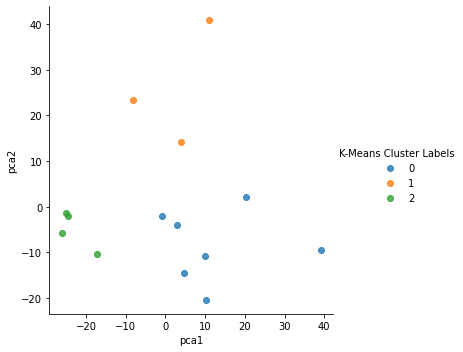

In [34]:
sns.lmplot(x='pca1', y='pca2', hue='K-Means Cluster Labels', data=df_pca1,fit_reg=False)

In [11]:
k_clus2 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
k_clus2.fit(df_pca2)
df_pca2['K-Means Cluster Labels'] = k_clus2.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca2['K-Means Cluster Labels'])
print("\n")
print(k_clus2.labels_)

0     2
1     2
2     1
3     2
4     0
5     1
6     2
7     1
8     1
9     1
10    1
11    2
12    0
13    0
Name: K-Means Cluster Labels, dtype: int32


[2 2 1 2 0 1 2 1 1 1 1 2 0 0]


In [12]:
k_clus3 = KMeans(n_clusters=3, tol=0.004, max_iter=300)
#clus.fit(df.loc[:,'tempo':'mfcc10'])
# Compute k-means clustering.
k_clus3.fit(df_pca3)
df_pca3['K-Means Cluster Labels'] = k_clus3.labels_
#print(df['K-Means Cluster Labels'][:5].tolist())
print(df_pca3['K-Means Cluster Labels'])
print("\n")
print(k_clus3.labels_)

0     2
1     1
2     2
3     2
4     1
5     2
6     2
7     0
8     2
9     2
10    0
11    1
12    1
13    1
Name: K-Means Cluster Labels, dtype: int32


[2 1 2 2 1 2 2 0 2 2 0 1 1 1]


### Agglomerative clustering

0     2
1     0
2     0
3     0
4     1
5     0
6     2
7     2
8     0
9     0
10    0
11    1
12    1
13    1
Name: HCA Cluster Labels, dtype: int64
[2 0 0 0 1 0 2 2 0 0 0 1 1 1]


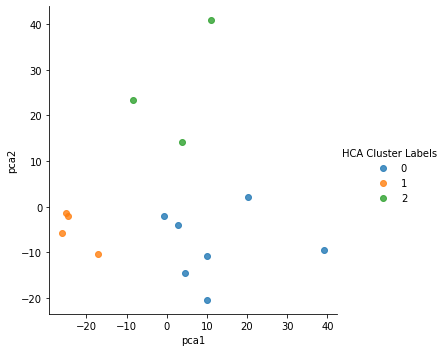

In [37]:
# linkage{“ward”, “complete”, “average”, “single”}
# Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
ag_clus1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# clus.fit(df.loc[:,'tempo':'mfcc10'])
new_df_pca1 = df_pca1.loc[:,'pca1':'pca2']
ag_clus1.fit(new_df_pca1)
new_df_pca1['HCA Cluster Labels'] = ag_clus1.labels_
print(new_df_pca1['HCA Cluster Labels'])
print(ag_clus1.labels_)
sns.lmplot(x='pca1',y='pca2',hue='HCA Cluster Labels',data=new_df_pca1,fit_reg=False)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [91.25, 91.25, 130.0, 130.0],
  [52.5, 52.5, 110.625, 110.625],
  [13.75, 13.75, 81.5625, 81.5625]],
 'dcoord': [[0.0, 0.7106827813225053, 0.7106827813225053, 0.0],
  [0.0, 4.976395575292897, 4.976395575292897, 0.7106827813225053],
  [0.0, 13.187089713734792, 13.187089713734792, 4.976395575292897],
  [0.0, 15.274240700945002, 15.274240700945002, 0.0],
  [0.0, 29.548809090964184, 29.548809090964184, 15.274240700945002],
  [0.0, 4.095077747076359, 4.095077747076359, 0.0],
  [0.0, 6.469983714888475, 6.469983714888475, 0.0],
  [0.0, 9.489785143960676, 9.489785143960676, 6.469983714888475],
  [4.095077747076359,
   21.880672090272743,
   21.880672090272743,
   9.489785143960676],
  [0.0, 22.028

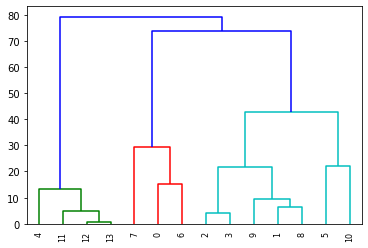

In [36]:
temp_df = df_pca1.loc[:,'pca1':'pca2']
z = hierarchy.linkage(temp_df,'ward')
hierarchy.dendrogram(z, leaf_rotation=90, leaf_font_size=8, labels=temp_df.index)

In [38]:
ag_clus2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# clus.fit(df.loc[:,'tempo':'mfcc10'])
#new_df_pca2 = df_pca2.loc[:,'pca1':'pca2']
ag_clus2.fit(df_pca2)
df_pca2['HCA Cluster Labels'] = ag_clus2.labels_
print(df_pca2['HCA Cluster Labels'])
print(ag_clus2.labels_)
#sns.lmplot(x='pca1',y='pca2',hue='HCA Cluster Labels',data=new_df_pca2,fit_reg=False)

0     1
1     1
2     0
3     1
4     2
5     0
6     1
7     0
8     0
9     0
10    0
11    1
12    2
13    2
Name: HCA Cluster Labels, dtype: int64
[1 1 0 1 2 0 1 0 0 0 0 1 2 2]


In [39]:
ag_clus3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
#del df_pca3['K-Means Cluster Labels']
#new_df_pca1 = df_pca1[cols]
ag_clus3.fit(df_pca3)
df_pca3['HCA Cluster Labels'] = ag_clus3.labels_
print(df_pca3['HCA Cluster Labels'])
print(ag_clus3.labels_)
#sns.lmplot(x='mfcc2',y='mel3',hue='HCA Cluster Labels',data=new_df_pca1,fit_reg=False)

0     0
1     0
2     0
3     0
4     1
5     2
6     0
7     2
8     0
9     0
10    2
11    1
12    1
13    1
Name: HCA Cluster Labels, dtype: int64
[0 0 0 0 1 2 0 2 0 0 2 1 1 1]


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [90.0, 90.0, 122.5, 122.5],
  [52.5, 52.5, 106.25, 106.25],
  [13.75, 13.75, 79.375, 79.375]],
 'dcoord': [[0.0, 33.91098073247307, 33.91098073247307, 0.0],
  [0.0, 39.13909003316887, 39.13909003316887, 33.91098073247307],
  [0.0, 66.96749289606832, 66.96749289606832, 39.13909003316887],
  [0.0, 66.7953360418749, 66.7953360418749, 0.0],
  [0.0, 94.10372588179919, 94.10372588179919, 66.7953360418749],
  [0.0, 30.190503181177906, 30.190503181177906, 0.0],
  [0.0, 46.37552061207692, 46.37552061207692, 0.0],
  [30.190503181177906,
   73.36104142154043,
   73.36104142154043,
   46.37552061207692],
  [0.0, 40.8188083469417, 40.8188083469417, 0.0],
  [0.0, 75.08722943812, 75.08722943812, 40.81880

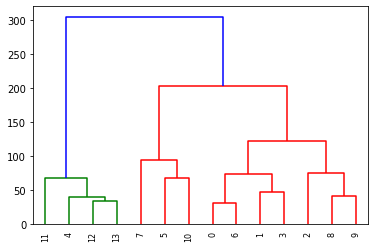

In [40]:
z = hierarchy.linkage(df_pca3,'ward')
hierarchy.dendrogram(z, leaf_rotation=90, leaf_font_size=8, labels=df_pca3.index)

### Spectral Clustering

0     1
1     0
2     0
3     0
4     2
5     0
6     0
7     1
8     0
9     0
10    0
11    2
12    2
13    2
Name: Spectral Cluster Labels, dtype: int32
[1 0 0 0 2 0 0 1 0 0 0 2 2 2]


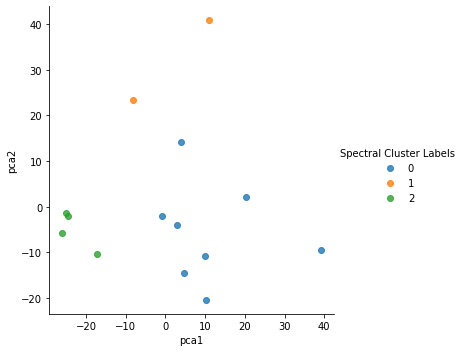

In [41]:
sp_clus1 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
temp_df1 = df_pca1.loc[:,'pca1':'pca2']
sp_clus1.fit(temp_df1)
temp_df1['Spectral Cluster Labels'] = sp_clus1.labels_
print(temp_df1['Spectral Cluster Labels'])
print(sp_clus1.labels_)
sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)

In [43]:
sp_clus2 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
#del df_pca1['HCA Cluster Labels']
sp_clus2.fit(df_pca2)
df_pca2['Spectral Cluster Labels'] = sp_clus2.labels_
#sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)
print(df_pca2['Spectral Cluster Labels'])
print(sp_clus2.labels_)

0     2
1     0
2     1
3     2
4     0
5     1
6     2
7     1
8     1
9     2
10    1
11    0
12    0
13    0
Name: Spectral Cluster Labels, dtype: int32
[2 0 1 2 0 1 2 1 1 2 1 0 0 0]


In [44]:
sp_clus3 = SpectralClustering(n_clusters=3, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)
#del df_pca1['HCA Cluster Labels']
sp_clus3.fit(df_pca3)
df_pca3['Spectral Cluster Labels'] = sp_clus3.labels_
#sns.lmplot(x='pca1',y='pca2',hue='Spectral Cluster Labels',data=temp_df1,fit_reg=False)
print(df_pca3['Spectral Cluster Labels'])
print(sp_clus3.labels_)

0     1
1     0
2     1
3     1
4     0
5     1
6     1
7     2
8     1
9     1
10    2
11    0
12    0
13    0
Name: Spectral Cluster Labels, dtype: int32
[1 0 1 1 0 1 1 2 1 1 2 0 0 0]


## clustering valuation(군집 모델 평가하기)
###  target value로 clustering 평가하기
agglomerative algorithm의 결과를 실제 정답 cluster와 비교하여 평가할 수 있는 지표는<br>
그 중 첫번째 방법을 사용해본다.

## 1. Advanced Rand Index
### k-means 클러스터링 결과 평가

In [45]:
# [0,0,0,0,0,0,0,1,1,1,1,2,2,2]
# [0,0,0,0,0,0,0,2,2,2,2,1,1,1]
# [1,1,1,1,1,1,1,0,0,0,0,2,2,2]
# [1,1,1,1,1,1,1,2,2,2,2,0,0,0]
# [2,2,2,2,2,2,2,0,0,0,0,1,1,1]
# [2,2,2,2,2,2,2,1,1,1,1,0,0,0]

#K-means
print(adjusted_rand_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], k_clus1.labels_))
print(fowlkes_mallows_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], k_clus1.labels_))
print(normalized_mutual_info_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], k_clus1.labels_))
print(adjusted_mutual_info_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], k_clus1.labels_), end="\n\n")

print(adjusted_rand_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], k_clus2.labels_))
print(fowlkes_mallows_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], k_clus2.labels_))
print(normalized_mutual_info_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], k_clus2.labels_))
print(adjusted_mutual_info_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], k_clus2.labels_), end="\n\n")

print(adjusted_rand_score([2,2,2,2,2,2,2,0,0,0,0,1,1,1], k_clus3.labels_))
print(fowlkes_mallows_score([2,2,2,2,2,2,2,0,0,0,0,1,1,1], k_clus3.labels_))
print(normalized_mutual_info_score([2,2,2,2,2,2,2,0,0,0,0,1,1,1], k_clus3.labels_))
print(adjusted_mutual_info_score([2,2,2,2,2,2,2,0,0,0,0,1,1,1], k_clus3.labels_), end="\n\n")


# Agglomerative
print(adjusted_rand_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus1.labels_))
print(fowlkes_mallows_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus1.labels_))
print(normalized_mutual_info_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus1.labels_))
print(adjusted_mutual_info_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus1.labels_), end="\n\n")

print(adjusted_rand_score([1,1,1,1,1,1,1,0,0,0,0,2,2,2], ag_clus2.labels_))
print(fowlkes_mallows_score([1,1,1,1,1,1,1,0,0,0,0,2,2,2], ag_clus2.labels_))
print(normalized_mutual_info_score([1,1,1,1,1,1,1,0,0,0,0,2,2,2], ag_clus2.labels_))
print(adjusted_mutual_info_score([1,1,1,1,1,1,1,0,0,0,0,2,2,2], ag_clus2.labels_), end="\n\n")

print(adjusted_rand_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus3.labels_))
print(fowlkes_mallows_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus3.labels_))
print(normalized_mutual_info_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus3.labels_))
print(adjusted_mutual_info_score([0,0,0,0,0,0,0,2,2,2,2,1,1,1], ag_clus3.labels_), end="\n\n")


# Spectral
print(adjusted_rand_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], sp_clus1.labels_))
print(fowlkes_mallows_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], sp_clus1.labels_))
print(normalized_mutual_info_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], sp_clus1.labels_))
print(adjusted_mutual_info_score([0,0,0,0,0,0,0,1,1,1,1,2,2,2], sp_clus1.labels_), end="\n\n")

print(adjusted_rand_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], sp_clus2.labels_))
print(fowlkes_mallows_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], sp_clus2.labels_))
print(normalized_mutual_info_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], sp_clus2.labels_))
print(adjusted_mutual_info_score([2,2,2,2,2,2,2,1,1,1,1,0,0,0], sp_clus2.labels_), end="\n\n")

print(adjusted_rand_score([1,1,1,1,1,1,1,2,2,2,2,0,0,0], sp_clus3.labels_))
print(fowlkes_mallows_score([1,1,1,1,1,1,1,2,2,2,2,0,0,0], sp_clus3.labels_))
print(normalized_mutual_info_score([1,1,1,1,1,1,1,2,2,2,2,0,0,0], sp_clus3.labels_))
print(adjusted_mutual_info_score([1,1,1,1,1,1,1,2,2,2,2,0,0,0], sp_clus3.labels_), end="\n\n")

0.15464480874316938
0.43333333333333335
0.3828374552222262
0.2415122124694746

0.24124513618677046
0.48304589153964794
0.4263313849634936
0.2972390271892959

0.26652337452982267
0.5163977794943222
0.4885383894594298
0.37173284028260256

0.15464480874316938
0.43333333333333335
0.3828374552222262
0.2415122124694746

0.24124513618677046
0.48304589153964794
0.4263313849634936
0.2972390271892959

0.2540983606557377
0.5000000000000001
0.42374138681582135
0.2917828143364389

0.21284403669724772
0.49377071987869403
0.39881089555601895
0.2577062432016619

0.125
0.3938631807216881
0.3695637907512925
0.2294984880579447

0.26652337452982267
0.5163977794943222
0.4885383894594297
0.3717328402826026

